Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


Data Collection & Processing

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')
'''
titanic_data.head()
titanic_data.shape
titanic_data.info()
titanic_data.isnull().sum()
'''
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
print(titanic_data['Embarked'].mode())
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)



Data Analysis

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

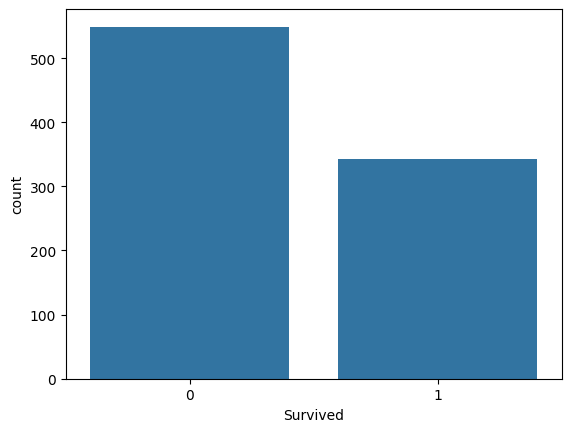

In [ ]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

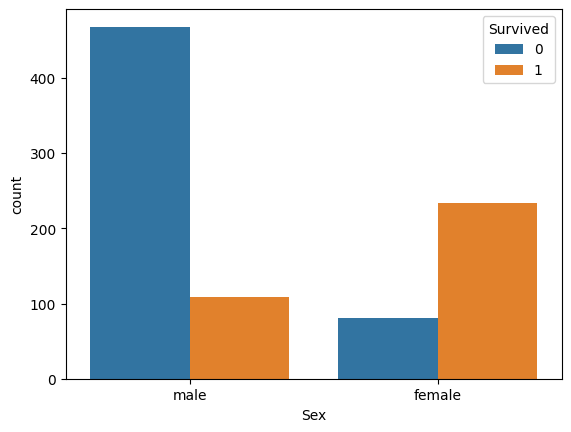

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

Encode Categorical Cols

In [ ]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
titanic_data.replace({'Sex': {'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
X = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [ ]:
model = LogisticRegression()

model.fit(X_train,Y_train)


Model Evaluation

In [ ]:
X_train_predict = model.predict(X_train)
train_data_accu = accuracy_score(Y_train, X_train_predict)
print(train_data_accu)

0.8075842696629213


In [ ]:
X_test_predict = model.predict(X_test)
test_data_accu = accuracy_score(Y_test, X_test_predict)
print(test_data_accu)

0.7821229050279329


In [ ]:
print(confusion_matrix(Y_test, X_test_predict))
print(classification_report(Y_test, X_test_predict))


[[91  9]
 [30 49]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

